In [1]:
import mdi.globals as gl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import pandas as pd

plt.style.use('default')

In [2]:
data = pd.read_csv(os.path.join(gl.baseDir, gl.behavDir, 'MDI0_merged.csv'))
data = data[(data.BN>1) & (data.correct==1)]
data = data.groupby(['SID', 'Quartet', 'PosInQuartet']).median(numeric_only=True).reset_index()
data['MovementTime'] = (data['MovementTime']- data.groupby('SID')['MovementTime'].transform('mean'))

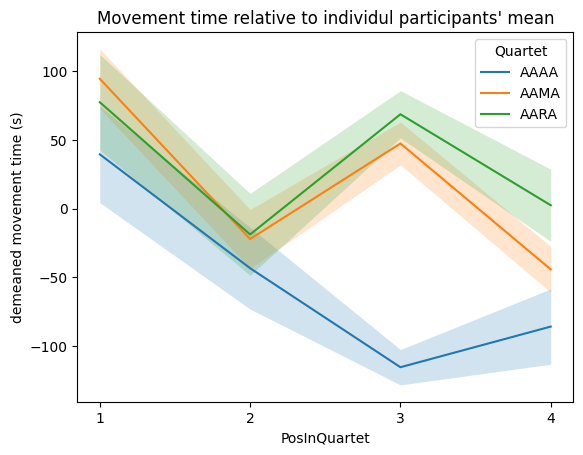

In [8]:
fig, ax = plt.subplots()
sb.lineplot(data=data, ax=ax, x='PosInQuartet', y='MovementTime', hue='Quartet', err_kws={'linewidth': 0}, errorbar='se')

ax.set_title("Movement time relative to individul participants' mean")
ax.set_ylabel("demeaned movement time (s)")
ax.set_xticks([1, 2, 3, 4])

plt.show()